[View in Colaboratory](https://colab.research.google.com/github/gazorpazorpfield/Titantic-ML-from-Disaster/blob/master/Titantic.ipynb)

In [125]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [126]:
import io
import pandas as pd
gender_sub= pd.read_csv(io.StringIO(uploaded['gender_submission.csv'].decode('utf=8')))
test_data = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf=8')))
train_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf=8')))
gender_sub.head()
test_data.head()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
import numpy as np
import random as rnd
import matplotlib as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
train_df = train_data
test_df = test_data
combine = [train_df, test_df]

In [131]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Text(0.5,1,u'Women Survived')

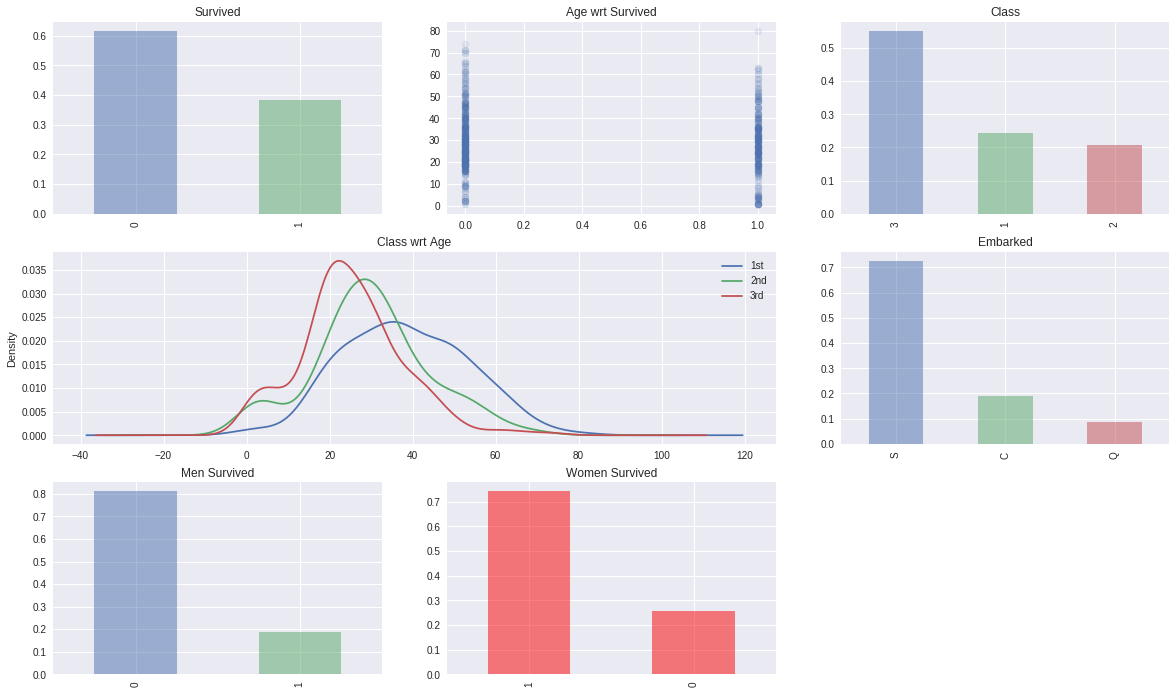

In [132]:
fig = plt.figure(figsize=(20,12))

female_color = "#FA0000"
plt.subplot2grid((3,3), (0,0))
train_df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3,3), (0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=0.1)
plt.title("Age wrt Survived")

plt.subplot2grid((3,3), (0,2))
train_df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Class")

plt.subplot2grid((3,3), (1,0), colspan=2)
for x in [1,2,3]:
  train_df.Age[train_df.Pclass ==x].plot(kind='kde')
plt.title("Class wrt Age")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((3,3), (1,2))
train_df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Embarked")

plt.subplot2grid((3,3), (2,0))
train_df.Survived[train_df.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,3), (2,1))
train_df.Survived[train_df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Women Survived")



Text(0.5,1,u'Poor Women Survived')

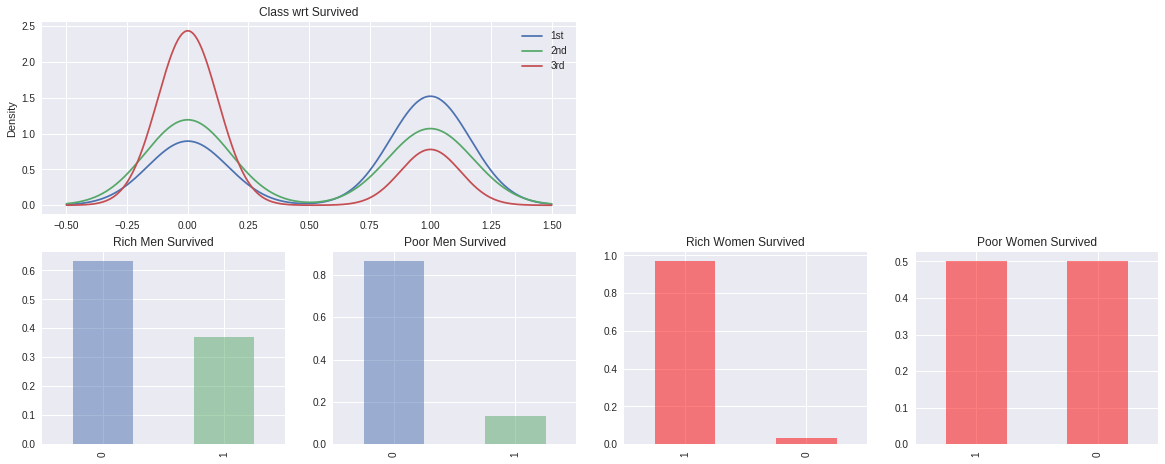

In [134]:
fig = plt.figure(figsize=(20,12))
plt.subplot2grid((3,4), (1,0), colspan=2)
for x in [1,2,3]:
  train_df.Survived[train_df.Pclass ==x].plot(kind='kde')
plt.title("Class wrt Survived")
plt.legend(("1st", "2nd", "3rd"))
                    

                    
plt.subplot2grid((3,4), (2,0))
train_df.Survived[(train_df.Sex == "male") & (train_df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Rich Men Survived")

plt.subplot2grid((3,4), (2,1))
train_df.Survived[(train_df.Sex == "male") & (train_df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Poor Men Survived")

           
plt.subplot2grid((3,4), (2,2))
train_df.Survived[(train_df.Sex == "female") & (train_df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Rich Women Survived")

plt.subplot2grid((3,4), (2,3))
train_df.Survived[(train_df.Sex == "female") & (train_df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=female_color)
plt.title("Poor Women Survived")

In [135]:

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [136]:
train_df.info()
print('_'*40)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [137]:
#Gender Classification Training
train_df["Hyp"] = 0
train_df.loc[train_df.Sex == "female", "Hyp"] = 1

train_df["Result"] = 0
train_df.loc[train_df.Survived == train_df["Hyp"], "Result"] = 1

print train_df["Result"].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [138]:
#Linear Regression
from sklearn import linear_model, preprocessing
!pip install datacleaner
from datacleaner import autoclean

train_df= autoclean(train_df)

target = train_df["Survived"].values
feature_names= ["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]
features = train_df[feature_names].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

print classifier_.score(features, target)

0.8035914702581369


In [139]:
#Polynomial
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
print classifier_.score(poly_features, target)

0.8305274971941639
